# Interactive JCPDS

In [1]:
%matplotlib inline

* This notebook shows how to make jupyter notebook interactive.

In [2]:
%ls ./jcpds/

0JCPDSformat.txt*                alooh.jcpds
Al2SiO5.jcpds                    ar-NoTh.jcpds*
Ar-hcp-NoTh.jcpds                au-Dewaele.jcpds*
CF_75_Na.jcpds*                  au-Ye2017.jcpds*
Ga2O3.jcpds                      au.jcpds*
H-phase_Zhang2014.jcpds          bm-test.jcpds
LICENSE                          casio3-pv.jcpds*
LiGaO2.jcpds                     casio_Linbo3.jcpds*
Linbo3_Megaw (1968).jcpds        diamond-NoTh.jcpds*
Mg2FeAl2Si3O12-gt.jcpds*         mg0.8fe0.2sio3-opv.jcpds*
Mg3Al2Si3O12-pyrope.jcpds        mg0.9fe0.1sio3-opv.jcpds*
MgAl2O4 Liu 1978.jcpds           mg2sio4-g.jcpds*
MgAlSiO3-gt.jcpds*               mgal2o4-CF.jcpds*
MgAlSiO3-ilm.jcpds*              mgo-Ye2017.jcpds*
MgAlSiO3-opv.jcpds*              mgo.jcpds*
MgFe2SiO4-g.jcpds                mgsio3-ilm.jcpds*
MgFeAlSiO3-cgt.jcpds             mgsio3-opv.jcpds*
MgSiO3-bm.jcpds                  ne-NoTh.jcpds*
Na0.4Mg0.6Al1.6Si0.4O4-CF.jcpds  phaseD.jcpds*
PhaseX.jcpds                     phaseH.jcpds
REA

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from ipywidgets import interactive
import ipywidgets as widgets

In [5]:
import pymatgen as mg
from pymatgen import Lattice, Structure
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

In [7]:
import sys
sys.path.append('../../peakpo/')
sys.path.append('../local_modules')
import ds_jcpds

In [8]:
fn_jcpds = './jcpds/MgSiO3-bm.jcpds'

In [9]:
wl_xray = 0.3344
xrange = (0,40)

## Read back the written JCPDS for test

In [10]:
bm_high_p = ds_jcpds.JCPDS(filename = fn_jcpds)

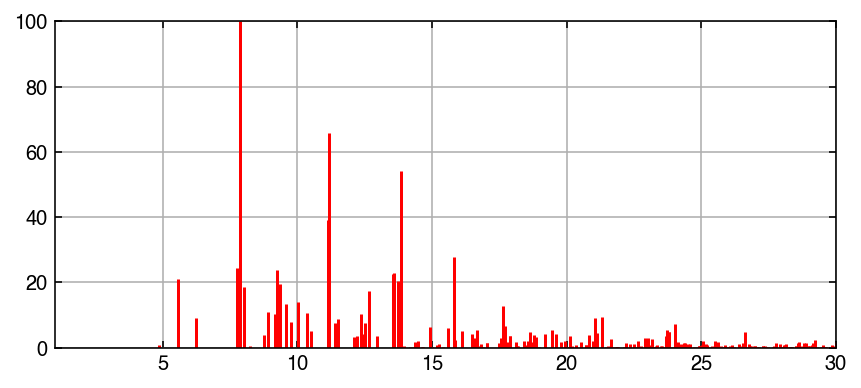

In [11]:
def f(pressure=0., temperature=300.):
    plt.figure(figsize=(7,3))
    bm_high_p.cal_dsp(pressure = pressure, temperature=temperature)
    bm_high_p.get_DiffractionLines()
    tth, inten = bm_high_p.get_tthVSint(wl_xray)
    plt.vlines(tth, 0., inten, color = 'r')
    plt.ylim(0, 100)
    plt.xlim(1,30)
    plt.grid(True)
    plt.show()

interactive_plot = interactive(f, 
                               pressure=widgets.FloatSlider(min=0, max=100, step=1, readout_format='.0f'), 
                               temperature=widgets.FloatSlider(min=300, max=3000, step=10, readout_format='.0f'))
output = interactive_plot.children[-1]
#output.layout.height = '300px'
interactive_plot

## Can we also change unit-cell parameters?

In [12]:
a_0 = bm_high_p.a0
b_0 = bm_high_p.b0
c_0 = bm_high_p.c0

In [13]:
v_0 = bm_high_p.v0

In [14]:
?bm_high_p.cal_dsp

Signature:
bm_high_p.cal_dsp(
    pressure=0.0,
    temperature=300.0,
    b_a=None,
    c_a=None,
    use_table_for_0GPa=True,
)
Docstring:
b_a and c_a are newly included for adjusting axial ratios.
For cubic structure, these two inputs are ignored.
For tetragonal and hexagonal, only c_a will be used.

recalculate_zero = False: use the table d-spacing value for 0 GPa
File:      ~/Dropbox (ASU)/Python/PeakPo-v7/peakpo/ds_jcpds/jcpds.py
Type:      method


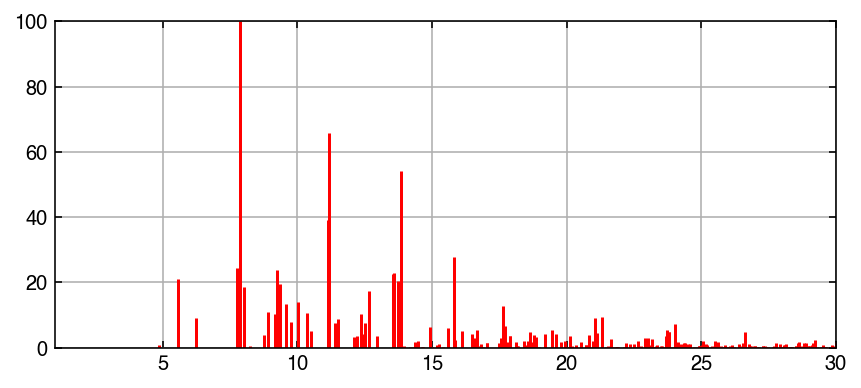

In [15]:
def f(pressure=0., temperature=300., a0=a_0, b0=b_0, c0=c_0):
    plt.figure(figsize=(7,3))
    bm_high_p.a0 = a0
    bm_high_p.b0 = b0
    bm_high_p.c0 = c0
    bm_high_p.cal_dsp(pressure = pressure, temperature=temperature,
                     use_table_for_0GPa=False)
    bm_high_p.get_DiffractionLines()
    tth, inten = bm_high_p.get_tthVSint(wl_xray)
    plt.vlines(tth, 0., inten, color = 'r')
    plt.ylim(0, 100)
    plt.xlim(1,30)
    plt.grid(True)
    plt.show()

min_frac=0.9
max_frac=1.1
interactive_plot = interactive(f, 
                               pressure=widgets.FloatSlider(min=0, max=100, step=1, readout_format='.0f'), 
                               temperature=widgets.FloatSlider(min=300, max=3000, step=10, readout_format='.0f'),
                               a0=widgets.FloatSlider(value=a_0, min=a_0*min_frac, max=a_0*max_frac, step=0.001, readout_format='.3f'),
                               b0=widgets.FloatSlider(value=b_0, min=b_0*min_frac, max=b_0*max_frac, step=0.001, readout_format='.3f'),
                               c0=widgets.FloatSlider(value=c_0, min=c_0*min_frac, max=c_0*max_frac, step=0.001, readout_format='.3f'))
output = interactive_plot.children[-1]
#output.layout.height = '300px'
interactive_plot